In [1]:
# Adding dropout
# In keras the dropout rate , argument rate defines what percentage of the input units to shut off, put the dropout layer
# just before the layer you want the dropout to applied to

In [2]:
# Let's continue developing the red wine model. Now we will increase the capacity even more.
# but add dropout to control overfitting, and batch normalization to speed up ptimization
# This  time we will also leave off standardizing the data, to demonstrate how batch normalization
# can stablize the training

In [9]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set matplot lib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd
red_wine = pd.read_csv('red-wine.csv')
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
x_train = df_train.drop('quality', axis = 1)
x_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [10]:
# Adding dropout
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

C:\Users\91798\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [13]:
history = model.fit(
    x_train, y_train,
    validation_data = (x_valid, y_valid),
    batch_size = 256, 
    epochs = 100,
    verbose = 0
)

<Axes: >

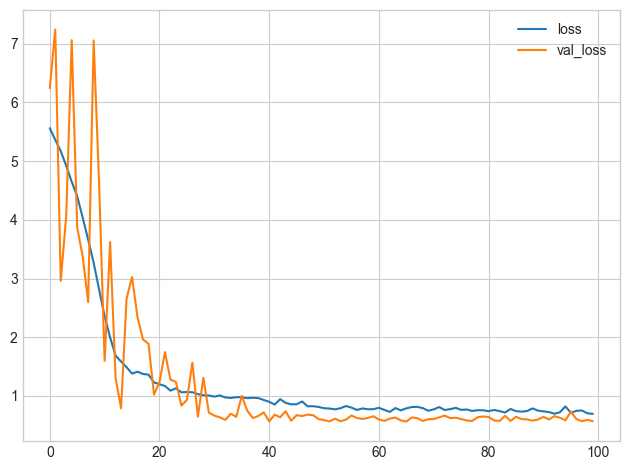

In [14]:
# Show the learning curve
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()